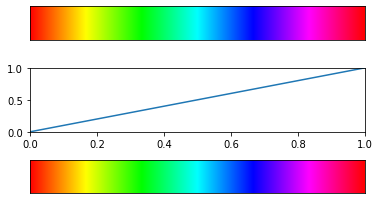

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from colormap.colors import hls2rgb

def show_image(hue, ax):
    img = np.empty((50, len(hue), 3))
    img[:,:,:] = np.array([hls2rgb(h,0.5,1) for h in hue])
    
    ax.imshow(img)
    ax.set_yticks(ticks=[])
    ax.set_xticks(ticks=[])
    
def show_func(func, width=500):
    xs = np.linspace(0, 1, width)
    ys = np.vectorize(func)(xs)
    
    fig, axes = plt.subplots(3,1)
    
    show_image(ys, axes[0])
    axes[1].plot(xs, ys)
    axes[1].set_xlim(0,1)
    axes[1].set_ylim(0,1)
    show_image(xs, axes[2])
    
    plt.show()

show_func(lambda x: x)

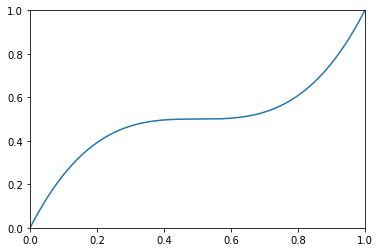

In [2]:
import math

def plot(func, width=500):
    xs = np.linspace(0, 1, width)
    ys = np.vectorize(func)(xs)
    
    plt.plot(xs, ys)
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.show()
    
def basic(x):
    return 4*(x-0.5)**3+0.5

plot(basic)

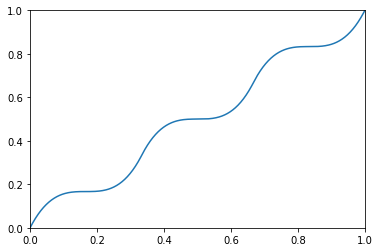

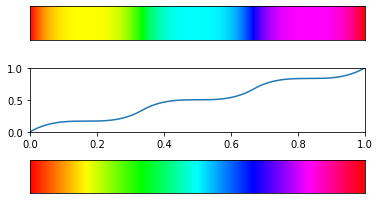

In [3]:
def from_basic(func):
    def f(x):
        a = 3*x
        b = math.floor(a)/3
        c = a - math.floor(a)

        return b + func(c)/3
    
    return f

plot(from_basic(basic))
show_func(from_basic(basic))

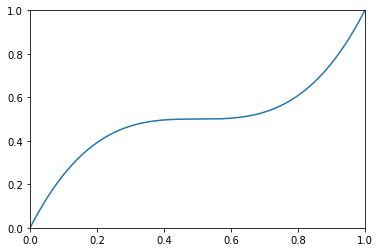

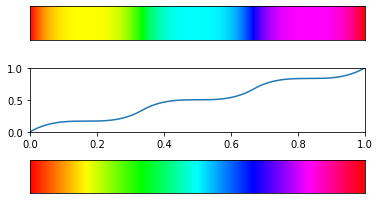

In [4]:
def from_basic2(func):
    def g(x):
        x2 = (x-0.5)*2
        
        if x2 >= 0:
            return func(x2)/2+0.5
        else:
            return -func(-x2)/2+0.5
    
    return g
    
    
plot(from_basic2(lambda x: x**3))
show_func(from_basic(from_basic2(lambda x: x**3)))

1.0


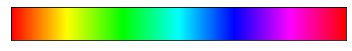

1.1052631578947367


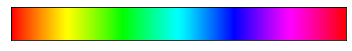

1.2105263157894737


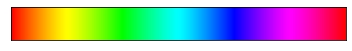

1.3157894736842106


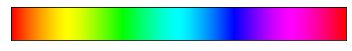

1.4210526315789473


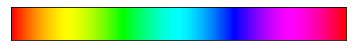

1.526315789473684


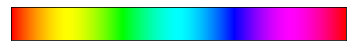

1.631578947368421


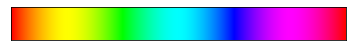

1.736842105263158


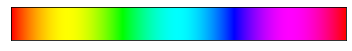

1.8421052631578947


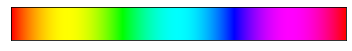

1.9473684210526314


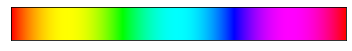

2.052631578947368


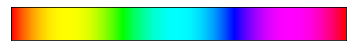

2.1578947368421053


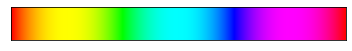

2.263157894736842


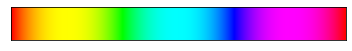

2.3684210526315788


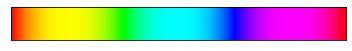

2.473684210526316


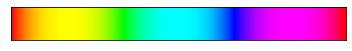

2.5789473684210527


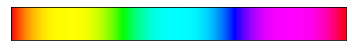

2.6842105263157894


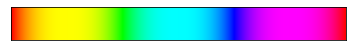

2.789473684210526


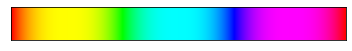

2.894736842105263


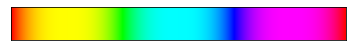

3.0


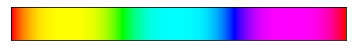

In [5]:
def show_func2(func, width=500):
    xs = np.linspace(0, 1, width)
    ys = np.vectorize(func)(xs)
    
    fig, ax = plt.subplots(1,1)
    
    show_image(ys, ax)
    plt.show()
    
for n in np.linspace(1,3,20):
    print(n)
    show_func2(from_basic(from_basic2(lambda x: x**n)))